In [1]:
import numpy as np
import Filters
import VirtualBug
from matplotlib import pyplot as plt
%matplotlib inline

This is an example of how an EKF using a 4 dimensional state vector can track an object moving around in 2d space. The states are x and y position as well as velocity. The state vector is $$(x, \dot{x}, y, \dot{y})$$ and the jacobian is:
\begin{bmatrix}
 1& 0 & 1 & 0\\ 
 0& 1 & 0 & 1\\ 
 0& 0 & 1 & 0\\ 
 0& 0 & 0 & 1
\end{bmatrix}

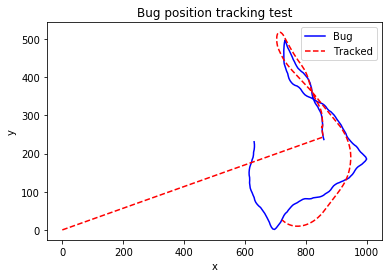

In [2]:
nmoves = 200
bugPositions = np.zeros((nmoves, 2))
trackedPositins  = np.zeros((nmoves, 2))
testBug = VirtualBug.VirtualBug()
kf = None
for i in range(nmoves):
    bugPositions[i, :] = np.array([testBug.x, testBug.y])
    if i == 2:
        kf = Filters.Kalman(bugPositions[0, 0], bugPositions[0, 1], bugPositions[1, 0], bugPositions[1, 1])
    if i > 2:
        trackedPositins[i, 0] = kf.X[0]
        trackedPositins[i, 1] = kf.X[1]
        kf.updatePredict(bugPositions[i, :])
    testBug.move()

plt.figure()
plt.title("Bug position tracking test")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(bugPositions[:, 0], bugPositions[:, 1], 'b-', label="Bug")
plt.plot(trackedPositins[:, 0], trackedPositins[:, 1], 'r--', label="Tracked")
plt.legend()
plt.show()